# GMM Classifier

In [1]:
# Mount Google drive and cd to working folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/Learning/EIE4105/lab1/python

Mounted at /content/drive
/content/drive/My Drive/Learning/EIE4105/lab1/python


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import visualize

In [3]:
# Load data
from mnist import load_mnist
trainpath = '../data/noisy_train_digits.mat'
testpath = '../data/noisy_test_digits.mat'
train_data, train_labels, test_data, test_labels= load_mnist(trainpath, testpath)

In [ ]:
# Load 100 training samples
from mnist import load_SampleMnist
nSamples = 100
train_data, train_labels, test_data, test_labels = load_SampleMnist(trainpath,testpath,nSamples)

In [ ]:
# Train a diag-cov GMM classifier
from classifier import classifier
M = 20
gmm_diag_cls = classifier(M, model_type='gmm', covariance_type='diag')
gmm_diag_cls.fit(train_data, train_labels)

Training label 0 (100 samples)
converged in 2 iterations in 0:00:00.015118
Training label 1 (100 samples)
converged in 2 iterations in 0:00:00.020991
Training label 2 (100 samples)
converged in 2 iterations in 0:00:00.009212
Training label 3 (100 samples)
converged in 2 iterations in 0:00:00.012421
Training label 4 (100 samples)
converged in 2 iterations in 0:00:00.010009
Training label 5 (100 samples)
converged in 2 iterations in 0:00:00.011993
Training label 6 (100 samples)
converged in 2 iterations in 0:00:00.015191
Training label 7 (100 samples)
converged in 2 iterations in 0:00:00.009290
Training label 8 (100 samples)
converged in 2 iterations in 0:00:00.011623
Training label 9 (100 samples)
converged in 2 iterations in 0:00:00.010019


(20, 784)


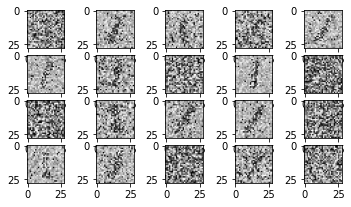

In [ ]:
# Visualize the mean vectors of one GMM
import visualize
means = gmm_diag_cls.models[1].means
print(means.shape)
visualize.plot_means(means)

In [ ]:
# Compute accuracy
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [ ]:
# Predict the labels of the test data
y_test_diag = gmm_diag_cls.predict(test_data)

In [ ]:
# Accuracy of GMM classifier on test data
accuracy(test_labels, y_test_diag)

0.3007

In [ ]:
# Train a full-cov GMM classifier
from classifier import classifier
M = 4
gmm_full_cls = classifier(M, model_type='gmm', covariance_type='full')
gmm_full_cls.fit(train_data, train_labels)

Training label 0 (5923 samples)
converged in 4 iterations in 0:00:14.453148
Training label 1 (6742 samples)
converged in 4 iterations in 0:00:13.284088
Training label 2 (5958 samples)
converged in 4 iterations in 0:00:17.968468
Training label 3 (6131 samples)
converged in 4 iterations in 0:00:15.596552
Training label 4 (5842 samples)
converged in 4 iterations in 0:00:14.569756
Training label 5 (5421 samples)
converged in 4 iterations in 0:00:14.522161
Training label 6 (5918 samples)
converged in 4 iterations in 0:00:16.067086
Training label 7 (6265 samples)
converged in 4 iterations in 0:00:14.663907
Training label 8 (5851 samples)
converged in 4 iterations in 0:00:16.689735
Training label 9 (5949 samples)
converged in 4 iterations in 0:00:14.782777


(8, 784)


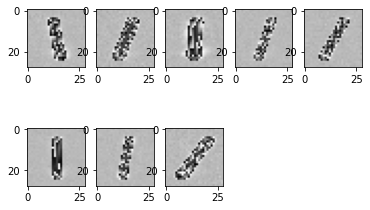

In [ ]:
# Visualize the mean vectors of one GMM
import visualize
means = gmm_full_cls.models[1].means
print(means.shape)
visualize.plot_means(means)

In [ ]:
# Predict the labels of the test data
y_test_full = gmm_full_cls.predict(test_data)

In [ ]:
# Accuracy of GMM classifier on test data
accuracy(test_labels, y_test_full)

0.098

# GMM Classifier on Clean Digit Images

In [4]:
# Load clean data
from mnist import load_mnist
trainpath = '../data/clean_train_digits.mat'
testpath = '../data/clean_test_digits.mat'
train_data, train_labels, test_data, test_labels= load_mnist(trainpath, testpath)

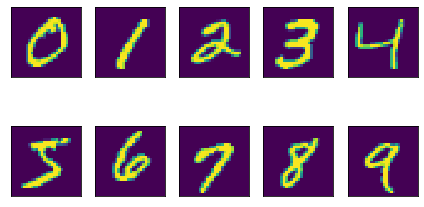

In [9]:
# Display some images
%matplotlib inline
import matplotlib.pyplot as plt

def show(data, labels):
    fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, )
    ax = ax.flatten()
    for i in range(10):
        j = [k for k in range(len(labels)) if labels[k] == i][0]
        img = data[j].reshape(28, 28)  # Convert 784-dim vector to 28x28 image
        img = ax[i].imshow(img, interpolation='nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

show(train_data, train_labels)

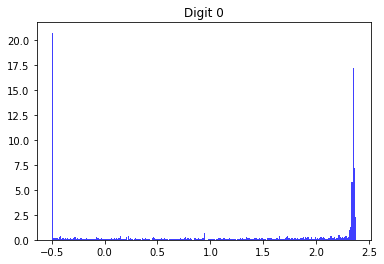

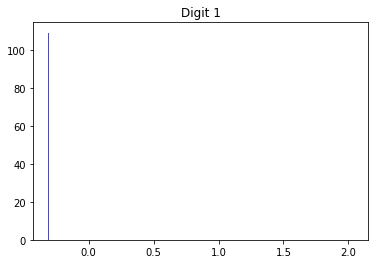

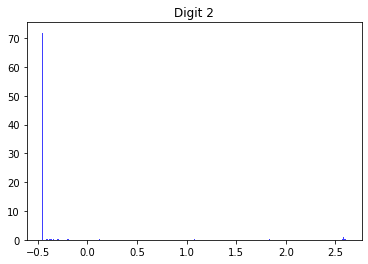

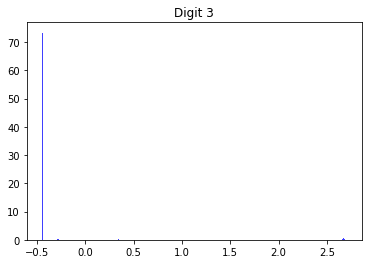

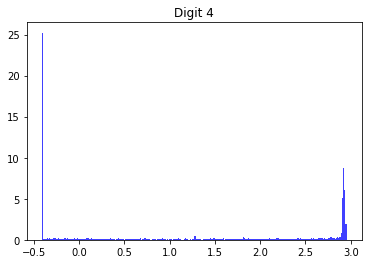

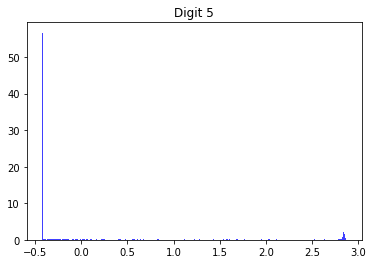

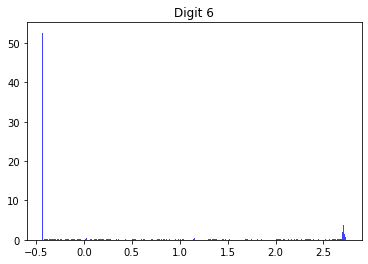

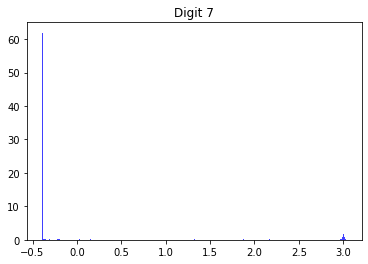

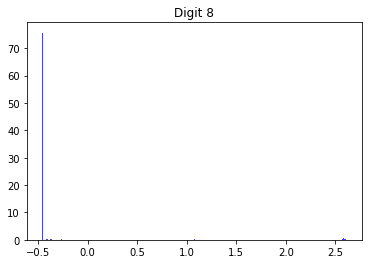

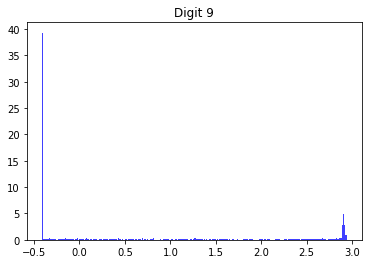

In [11]:
# Display histograms
def show_histogram(data, labels):
    for i in range(10):
        j = [k for k in range(len(labels)) if labels[k] == i]
        x400 = data[j, 399]    # 400-th pixel of of Digit i 
        n, bins, patches = plt.hist(x400, bins=256, density=True, facecolor='blue', alpha=0.75)
        plt.title(f'Digit {i}')
        plt.show()  
        
show_histogram(train_data, train_labels)